In [2]:
import numpy as np

x = np.array([1,2,3])
print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [4]:
W = np.array([[1,2,3], [4,5,6]])
print(W.shape)
print(W.ndim)

(2, 3)
2


In [5]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
print(W+X)
print(W*X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


In [6]:
A = np.array([[1,2],[3,4]])
A * 10  #넘파이의 브로드 캐스트를 이용해서 스칼라를 확장해서 처리해준다.

array([[10, 20],
       [30, 40]])

In [7]:
b = np.array([10,20])
A*b

array([[10, 40],
       [30, 80]])

### 벡터의 내적과 행렬의 곱

In [12]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b) #

32

In [14]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B) #이건 원소별 곱셈이 아니라 진짜 원래 행렬 곱셈이다.

array([[19, 22],
       [43, 50]])

## 신경망

In [17]:
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2) #이때 x[0]이 첫번째 입력데이터와 같은 방식이다.
h = np.matmul(x,W1)+b1
print(h)

[[ 1.01931491  1.53328397  0.68305378 -0.06844298]
 [-0.43158824 -1.73342265 -0.06783434  4.09969828]
 [ 1.61888934  3.11790212  2.10916003 -1.92484963]
 [ 1.37577529  2.51363943  1.71284066 -1.19395977]
 [ 1.07007207  1.590575    0.43836111 -0.1817283 ]
 [ 0.66041158  0.84390664  1.06165415  0.89486069]
 [ 0.15257915 -0.32307372  0.68664273  2.36722589]
 [ 0.61053386  0.66501872  0.71923673  1.07615784]
 [ 0.4078126  -0.0597255  -0.66143423  1.81169048]
 [ 1.32530516  2.33363857  1.37116674 -1.01108683]]


In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [22]:
a = sigmoid(h)
print(a)

[[0.73483913 0.82248629 0.66441993 0.48289593]
 [0.39374714 0.15015031 0.48304791 0.98369266]
 [0.8346419  0.95762518 0.8917903  0.12732174]
 [0.79831164 0.92509248 0.84720437 0.23255148]
 [0.74461062 0.83069699 0.60786845 0.45469255]
 [0.65935284 0.69928736 0.74300653 0.70989223]
 [0.53807096 0.41992684 0.66521967 0.91429373]
 [0.64806257 0.66038687 0.67243892 0.7457662 ]
 [0.60056327 0.48507306 0.34041751 0.85956606]
 [0.79006299 0.91162492 0.79756859 0.26676721]]


In [23]:
W2 = np.random.randn(4,3)  #출력층이 3개의 뉴런을 가지고 있으므로 맞춰서 처리해주었다.
b2 = np.random.randn(3)

s = np.matmul(a, W2) + b2 
print(s)

[[ 0.96647042 -0.46640232  3.55973201]
 [-0.73883334  0.18733436  1.94480357]
 [ 0.74649272 -0.79036985  4.57013892]
 [ 0.76741495 -0.67267669  4.32671937]
 [ 1.11848801 -0.57227079  3.44406833]
 [ 0.46439458 -0.01215071  3.46661445]
 [-0.20453036  0.25536588  2.81789626]
 [ 0.52498915 -0.02677407  3.22193721]
 [ 0.80362544 -0.18353616  2.11335764]
 [ 0.85413698 -0.67128239  4.15777838]]


In [24]:
class Sigmoid:
    def __init__(self):
        self.params = []  #학습하는 매개변수가 따로 없으므로 빈 리스트로 초기화
    
    def forward(self, x):
        return 1/ (1+np.exp(-x))

class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
    
    def forward(self,x):
        W, b = self.params
        out =np.matmul(x,W) + b
        return out

In [28]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #가중치와 편향 초기화
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]

        #모든 가중치를 리스트에 모은다
        self.params =[]
        for layer in self.layers:
            self.params += layer.params #이렇게 하나의 리스트에 보관하면 매개변수 갱신과 매개변서 저장을 손쉽게 처리할수 있다.
    
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x    

In [29]:
x  = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
print(s)

[[ 1.91090553 -1.50667329 -5.15689101]
 [ 1.15685703 -2.43875304 -5.11148748]
 [ 1.06735162 -0.77770282 -4.04569547]
 [ 1.41273039 -2.12273348 -5.06187884]
 [ 0.84468771 -1.40424042 -4.04186706]
 [ 1.55093315 -1.06477149 -4.47471372]
 [ 1.45602407 -1.75613186 -5.20282516]
 [ 0.86964521 -2.30165334 -4.30000362]
 [ 1.58957077 -2.05479333 -5.40660671]
 [ 1.26211507 -1.04415573 -4.36114579]]


### repeat 노드

In [32]:
D, N = 8, 7   #D 는 입력 데이터의 배열 길이, N은 입력값들을 복제해서 확장할 크기,
x = np.random.randn(1,D) #입력
y = np.repeat(x,N, axis = 0) #순전파 ,원소복제를한다.
dy = np.random.rand(N,D) #무작위 기울기
dx = np.sum(dy, axis = 0, keepdims = True) #keepdims 를 설정해서 2차원 배열의 차수를 유지한다.(True일떄는  1,D False일때는 D)

print(dx)

[[2.17569395 3.49265579 1.95549309 5.29364546 4.2617678  3.46676922
  4.05789788 3.96225477]]


### Sum 노드

In [34]:
D, N  = 8,7
x = np.random.rand(N,D)
y = np.sum(x, axis=0, keepdims =True)

dy = np.random.randn(1,D)
dx = np.repeat(dy,N,axis=0)

### MatMul 계층 구현하기

In [ ]:
class MatMul:
    def __init__(self, W):
        self.params = [W]   #학습하는 매개변수를 params에 보관한다.
        self.grads = [np.zepros_like(W)] #각각의 매개변수에 대응되는 기울기를 보관한다.
        self.x = None
    
    def forward(self, x):
        W, self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = mp.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0]][...] = dW #[...] elipsis기호를 쓰면 넘파이 배열이 가리키는 메모리위치를 고정하고 그 위치에 원소들을 덮어쓰는 것이다.
        #그냥 할당을 해도 되는데 이렇게 작성해주면 덮어쓰기가 되므로 깊은 복사를 하게된다. 얕은복사는 참조하는 포인터의 위치를 바꿔서 데이터만 가리켜 주고 깊은 복사는 그 데이터의 값을 지금 가리키고 있는 메모리 주소로 가져와서 데이터 자체를 복사해주는 것이다.
        #위와같이 메모리 주소를 고정함으로써 인스턴스 변수 grads를 다루기가 더 쉬워진다.(이렇게하면 위치가 고정이니까 기울기 그룹화 작업이 한번만 이루어진다는 것이다.)
        
        return dx
    

## 역전파 구현

In [35]:
class Sigmoid2:
    def __ini__(self):
        self.params, slef.grads = [], []
        self.out = None
    
    def forward(self, x):
        out = 1/ (1+ np.exp(-x))
        self.out = out
        return out

    def backward(self,dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

NameError: name '현' is not defined

In [36]:
class Affine:
    def __init__(self,W,b):
        self.params =[W,b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None 

    def forward(self,x):
        W,b = self.params 
        out = np.matmul(x,W)+b   #여기서 MatMul 노드가 들어가므로 역전파도 MatMul 노드를 고려해서 해줘야한다.
        self.x = x
        return out

    def backward(self,dout):
        W, b = self.params 
        dx = np.matmul(dout, W.T)
        dw = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)   #편향의 경우에는 N개의 미니배치가 들어오면 순전파에서 reqpeat Node 로 확장시켜 줘야 했기때문에 역전파에서도 repeat 노드의 sum을 이용해서 역전파를 구해준다.(이때 형상을 보고 어느 축을 기준으로 합할건지 정해줘야한다.)
        
        self.grads[0][...] = dW 
        self.grads[1][...] = db 
        return dx

In [38]:
class SGD:
    def __init__(self, lr =0.01):
        self.lr = lr 
    def update(self,params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [42]:
import sys
sys.path.append('..')
from dataset import spiral_dataset
import matplotlib.pyplot as plt 
x , t = spiral_dataset.load_data()
print('x',x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


In [57]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #가중치와 편향 초기화

        W1 = 0.01 * np.random.randn(I,H) #가중치는 작은 값으로 무작위 초기화
        b1= np.zeros(H)

        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)

        #계층 생성

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2,b2),
        ]
        self.loss_layer = SoftmaxWithLoss()

        #모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], [] 
        for layer in self.layers:
            self.params += layer.params 
            self.grads += layer.grads


    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [61]:
from common.optimizer import SGD


#하이퍼파라미터 설정

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

#데이터 읽기, 모델과 옵티마이저 생성
x , t = spiral_dataset.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer= SGD(lr = learning_rate)

#학습에 사용하는 변수
data_size = len(x)
max_iters = data_size //batch_size
total_loss =0
loss_count = 0 
loss_list = []

for epoch in range(max_epoch):
    #데이터 섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        #기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x , batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count +=1

        #정기적으로 학습결과 축력

        if (iters+1)%10 ==0:
            avg_loss = total_loss / loss_count
            print(f'에폭 {epoch+1}| 반복{iters+1}/{max_iters}| 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0,0

에폭 1| 반복10/10| 손실 1.13
에폭 2| 반복10/10| 손실 1.13
에폭 3| 반복10/10| 손실 1.12
에폭 4| 반복10/10| 손실 1.12
에폭 5| 반복10/10| 손실 1.11
에폭 6| 반복10/10| 손실 1.14
에폭 7| 반복10/10| 손실 1.16
에폭 8| 반복10/10| 손실 1.11
에폭 9| 반복10/10| 손실 1.12
에폭 10| 반복10/10| 손실 1.13
에폭 11| 반복10/10| 손실 1.12
에폭 12| 반복10/10| 손실 1.11
에폭 13| 반복10/10| 손실 1.09
에폭 14| 반복10/10| 손실 1.08
에폭 15| 반복10/10| 손실 1.04
에폭 16| 반복10/10| 손실 1.03
에폭 17| 반복10/10| 손실 0.96
에폭 18| 반복10/10| 손실 0.92
에폭 19| 반복10/10| 손실 0.92
에폭 20| 반복10/10| 손실 0.87
에폭 21| 반복10/10| 손실 0.85
에폭 22| 반복10/10| 손실 0.82
에폭 23| 반복10/10| 손실 0.79
에폭 24| 반복10/10| 손실 0.78
에폭 25| 반복10/10| 손실 0.82
에폭 26| 반복10/10| 손실 0.78
에폭 27| 반복10/10| 손실 0.76
에폭 28| 반복10/10| 손실 0.76
에폭 29| 반복10/10| 손실 0.78
에폭 30| 반복10/10| 손실 0.75
에폭 31| 반복10/10| 손실 0.78
에폭 32| 반복10/10| 손실 0.77
에폭 33| 반복10/10| 손실 0.77
에폭 34| 반복10/10| 손실 0.78
에폭 35| 반복10/10| 손실 0.75
에폭 36| 반복10/10| 손실 0.74
에폭 37| 반복10/10| 손실 0.76
에폭 38| 반복10/10| 손실 0.76
에폭 39| 반복10/10| 손실 0.73
에폭 40| 반복10/10| 손실 0.75
에폭 41| 반복10/10| 손실 0.76
에폭 42| 반복10/10| 손실 0.76
에

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 0.17
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 0.09
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.09
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 25 |  반복 1 / 10 | 시간

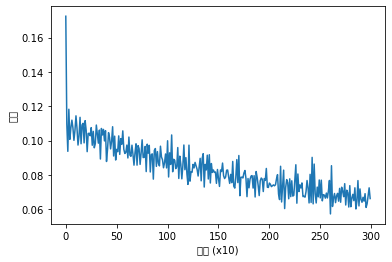

In [62]:
from common.trainer import Trainer

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch,batch_size, eval_interval=10)
trainer.plot()

In [63]:
a = np.random.randn(3)
a.dtype #64비트 부동소수점이 사용되는지 확인할수있다.

dtype('float64')

In [65]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [66]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')